In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# headers = ["LayerID0", "dE_L0", "LayerID1", "dE_L1", "ReactionLayerID"]
# df = pd.read_csv("Pareeksha_sim.csv", header=None, names=headers)

df = pd.read_csv("Pareeksha_data_2.csv")


# df.head()

df["dE_Tot"] = df["dE_L0"] + df["dE_L1"]
# df["dE_Tot"].describe()

df.head()

,LayerID0,dE_L0,LayerID1,dE_L1,ReactionLayerID,dE_Tot
0,0,991.720,1,977.526,0,1969.246
1,0,950.917,1,955.889,0,1906.806
2,0,987.598,1,1012.080,999,1999.678
3,0,994.208,1,994.188,1,1988.396
4,0,989.731,1,953.824,0,1943.555


In [8]:
print(df["dE_L0"].mean())
print(df["dE_L0"].std())
print(df["dE_L1"].mean())
print(df["dE_L1"].std())
print(df["dE_Tot"].mean())
print(df["dE_Tot"].std())

977.7448845588543
18.025733541025396
975.9298099092443
21.79543428315522
1953.674694468099
34.695971677264225


ReactionLayerID
0      98661
1      98490
999    22119
Name: count, dtype: int64


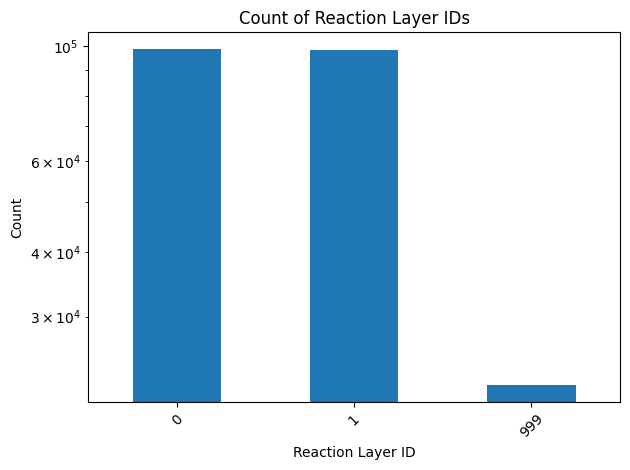

In [31]:
print(df["ReactionLayerID"].value_counts())
df["ReactionLayerID"].value_counts().plot(kind="bar", logy=True)

plt.xlabel("Reaction Layer ID")
plt.ylabel("Count")
plt.title("Count of Reaction Layer IDs")
plt.xticks(rotation=45)
plt.tight_layout()

In [32]:
df.query("ReactionLayerID==10")

,LayerID0,dE_L0,LayerID1,dE_L1,ReactionLayerID,dE_Tot


In [33]:
df.query("ReactionLayerID==11")

,LayerID0,dE_L0,LayerID1,dE_L1,ReactionLayerID,dE_Tot


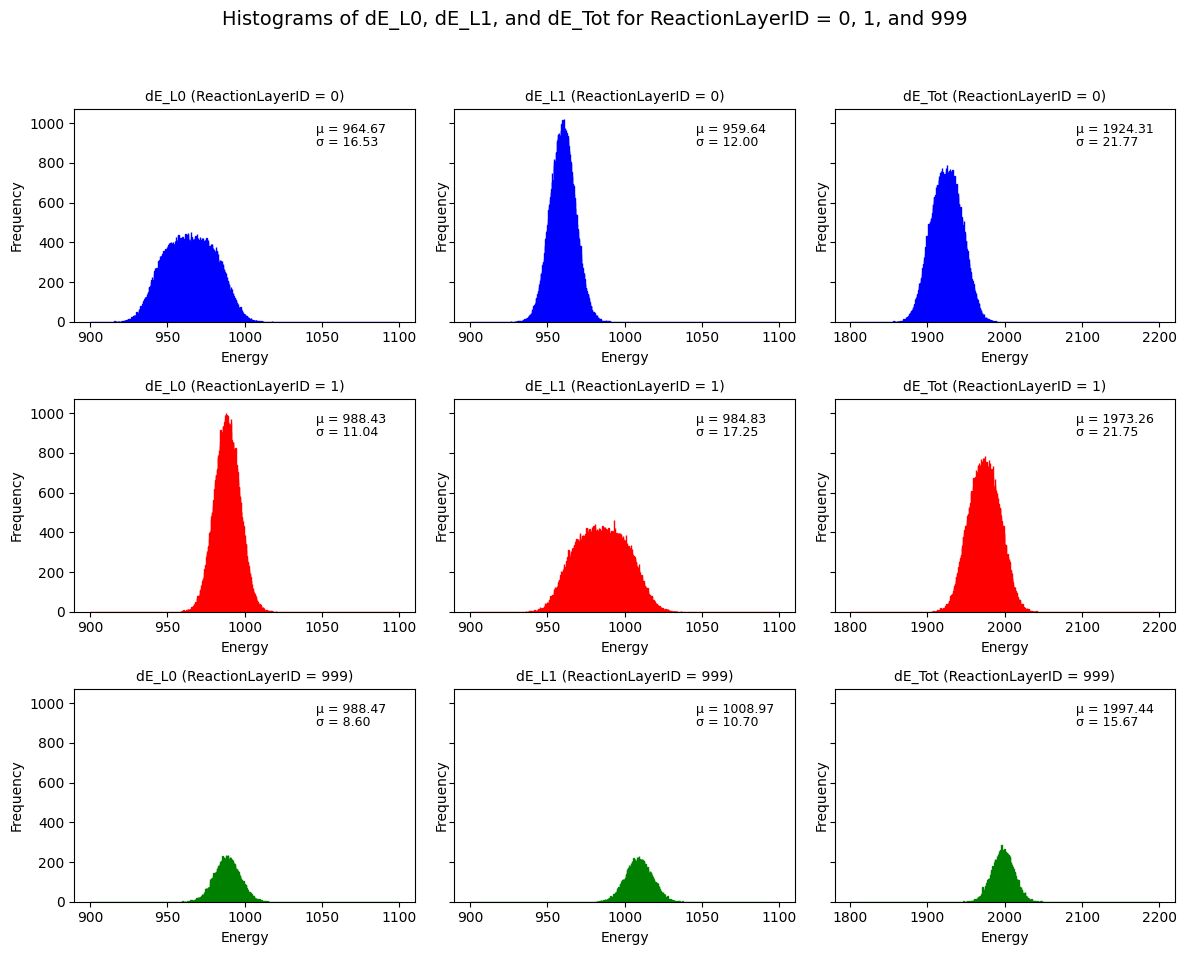

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Filter data
df0 = df.query("ReactionLayerID == 0")
df1 = df.query("ReactionLayerID == 1")
df999 = df.query("ReactionLayerID == 999")

# Create 3 rows, 3 columns grid
fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharex=False, sharey=True)
fig.suptitle("Histograms of dE_L0, dE_L1, and dE_Tot for ReactionLayerID = 0, 1, and 999", fontsize=14)

# Data for each plot
plot_data = [
    (axs[0, 0], df0["dE_L0"], "dE_L0 (ReactionLayerID = 0)", 'skyblue', 'blue'),
    (axs[0, 1], df0["dE_L1"], "dE_L1 (ReactionLayerID = 0)", 'skyblue', 'blue'),
    (axs[0, 2], df0["dE_Tot"], "dE_Tot (ReactionLayerID = 0)", 'skyblue', 'blue'),
    (axs[1, 0], df1["dE_L0"], "dE_L0 (ReactionLayerID = 1)", 'salmon', 'red'),
    (axs[1, 1], df1["dE_L1"], "dE_L1 (ReactionLayerID = 1)", 'salmon', 'red'),
    (axs[1, 2], df1["dE_Tot"], "dE_Tot (ReactionLayerID = 1)", 'salmon', 'red'),
    (axs[2, 0], df999["dE_L0"], "dE_L0 (ReactionLayerID = 999)", 'lightgreen', 'green'),
    (axs[2, 1], df999["dE_L1"], "dE_L1 (ReactionLayerID = 999)", 'lightgreen', 'green'),
    (axs[2, 2], df999["dE_Tot"], "dE_Tot (ReactionLayerID = 999)", 'lightgreen', 'green')
]

# Loop through subplots
for ax, data, title, color, edge in plot_data:
    # Select histogram range based on the variable
    if "dE_Tot" in title:
        hist_range = (1800, 2200)
    else:
        hist_range = (900, 1100)

    ax.hist(data, bins=1000, range=hist_range, color=color, edgecolor=edge)
    ax.set_title(title, fontsize=10)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Energy")

    # Compute stats
    mean = data.mean()
    std = data.std()

    # Create inset with stats
    inset = inset_axes(ax, width="30%", height="20%", loc="upper right")
    inset.axis('off')
    inset.text(0.1, 0.6, f"μ = {mean:.2f}", fontsize=9)
    inset.text(0.1, 0.3, f"σ = {std:.2f}", fontsize=9)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


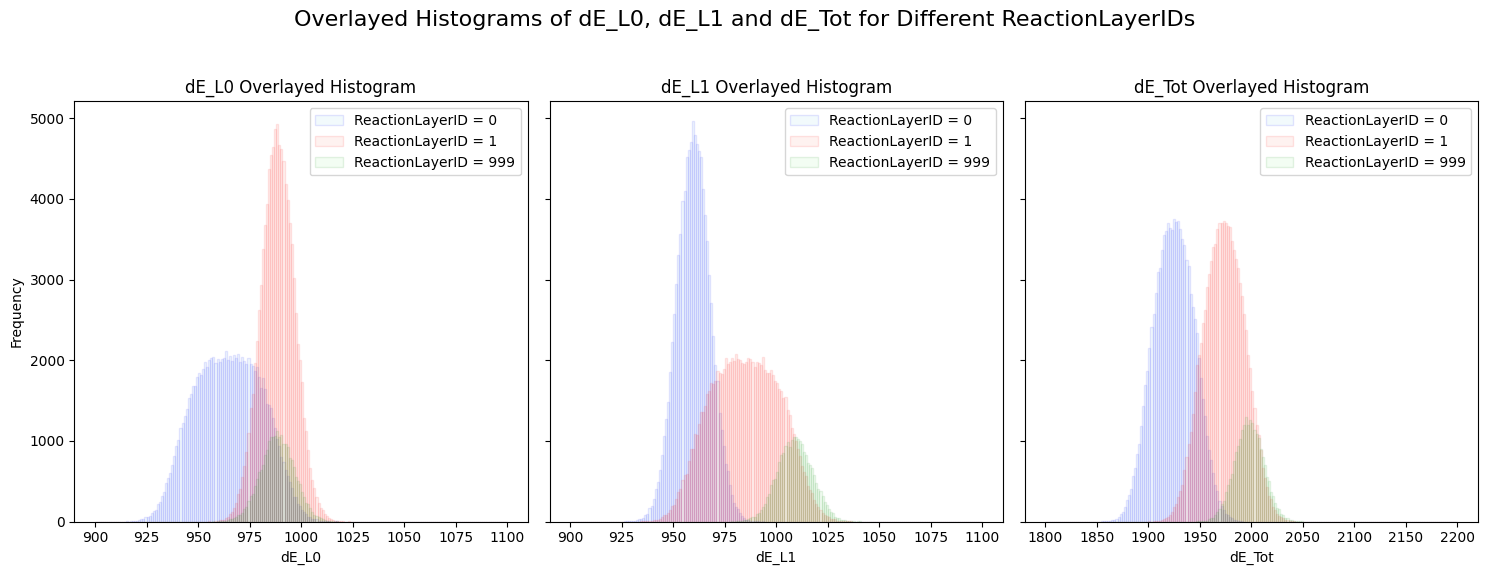

In [35]:
import matplotlib.pyplot as plt

# Filter data
df0 = df.query("ReactionLayerID == 0")
df1 = df.query("ReactionLayerID == 1")
df999 = df.query("ReactionLayerID == 999")

# Set up figure with 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle("Overlayed Histograms of dE_L0, dE_L1 and dE_Tot for Different ReactionLayerIDs", fontsize=16)

# First subplot: dE_L0
axs[0].hist(df0["dE_L0"], bins=200, range=(900, 1100), 
            color='skyblue', edgecolor='blue', alpha=0.1, label='ReactionLayerID = 0')

axs[0].hist(df1["dE_L0"], bins=200, range=(900, 1100), 
            color='salmon', edgecolor='red', alpha=0.1, label='ReactionLayerID = 1')

axs[0].hist(df999["dE_L0"], bins=200, range=(900, 1100),
            color='lightgreen', edgecolor='green', alpha=0.1, label='ReactionLayerID = 999')

axs[0].set_xlabel("dE_L0")
axs[0].set_ylabel("Frequency")
axs[0].set_title("dE_L0 Overlayed Histogram")
axs[0].legend()

# Second subplot: dE_L1
axs[1].hist(df0["dE_L1"], bins=200, range=(900, 1100), 
            color='skyblue', edgecolor='blue', alpha=0.1, label='ReactionLayerID = 0')

axs[1].hist(df1["dE_L1"], bins=200, range=(900, 1100), 
            color='salmon', edgecolor='red', alpha=0.1, label='ReactionLayerID = 1')

axs[1].hist(df999["dE_L1"], bins=200, range=(900, 1100),
            color='lightgreen', edgecolor='green', alpha=0.1, label='ReactionLayerID = 999')

axs[1].set_xlabel("dE_L1")
axs[1].set_title("dE_L1 Overlayed Histogram")
axs[1].legend()

# Third subplot: dE_Tot
axs[2].hist(df0["dE_Tot"], bins=200, range=(1800, 2200), 
            color='skyblue', edgecolor='blue', alpha=0.1, label='ReactionLayerID = 0')
axs[2].hist(df1["dE_Tot"], bins=200, range=(1800, 2200),
            color='salmon', edgecolor='red', alpha=0.1, label='ReactionLayerID = 1')
axs[2].hist(df999["dE_Tot"], bins=200, range=(1800, 2200),
            color='lightgreen', edgecolor='green', alpha=0.1, label='ReactionLayerID = 999')

axs[2].set_xlabel("dE_Tot")
axs[2].set_title("dE_Tot Overlayed Histogram")
axs[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# # Select features and target
# X = df[["dE_L0", "dE_L1", "dE_Tot"]]
# y = df["ReactionLayerID"]

# # Drop rows where any of the features or target is NaN
# df_clean = df[["dE_L0", "dE_L1", "dE_Tot", "ReactionLayerID"]].dropna()

# # Separate features and target again
# X = df_clean[["dE_L0", "dE_L1", "dE_Tot"]]
# y = df_clean["ReactionLayerID"]

from sklearn.impute import SimpleImputer

# Impute NaNs in features with mean (or median, or another strategy)
imputer = SimpleImputer(strategy='mean')
X = df[["dE_L0", "dE_L1", "dE_Tot"]]
X = imputer.fit_transform(X)

y = df["ReactionLayerID"]



# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[17306  2393     1]
 [ 2557 15479  1753]
 [    0  2205  2160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.77      0.78      0.78     19789
         999       0.55      0.49      0.52      4365

    accuracy                           0.80     43854
   macro avg       0.73      0.72      0.72     43854
weighted avg       0.79      0.80      0.80     43854



In [45]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[17324  2375     1]
 [ 2578 15488  1723]
 [    0  2231  2134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.77      0.78      0.78     19789
         999       0.55      0.49      0.52      4365

    accuracy                           0.80     43854
   macro avg       0.73      0.72      0.72     43854
weighted avg       0.79      0.80      0.80     43854



In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[17299  2397     4]
 [ 2553 13912  3324]
 [    0  1285  3080]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.79      0.70      0.74     19789
         999       0.48      0.71      0.57      4365

    accuracy                           0.78     43854
   macro avg       0.71      0.76      0.73     43854
weighted avg       0.80      0.78      0.79     43854



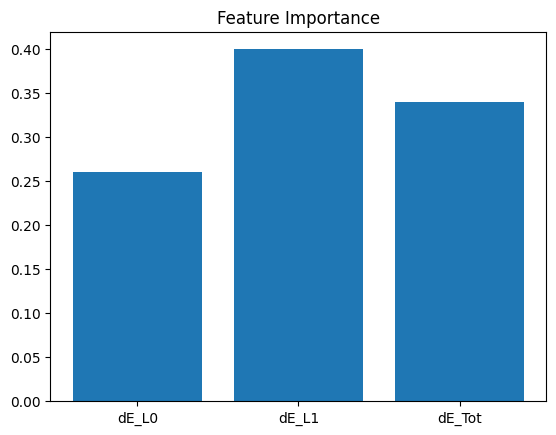

In [46]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns if hasattr(X, 'columns') else ['dE_L0', 'dE_L1', 'dE_Tot']
plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17300  2399     1]
 [ 2545 15509  1735]
 [    0  2232  2133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.77      0.78      0.78     19789
         999       0.55      0.49      0.52      4365

    accuracy                           0.80     43854
   macro avg       0.73      0.72      0.72     43854
weighted avg       0.79      0.80      0.80     43854



In [43]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[17759  1941     0]
 [ 2469 15757  1563]
 [    0  1926  2439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     19700
           1       0.80      0.80      0.80     19789
         999       0.61      0.56      0.58      4365

    accuracy                           0.82     43854
   macro avg       0.76      0.75      0.76     43854
weighted avg       0.82      0.82      0.82     43854



In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17726  1971     3]
 [ 2449 12828  4512]
 [    3   387  3975]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     19700
           1       0.84      0.65      0.73     19789
         999       0.47      0.91      0.62      4365

    accuracy                           0.79     43854
   macro avg       0.73      0.82      0.75     43854
weighted avg       0.82      0.79      0.79     43854



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Feature and target selection
X = df[["dE_L0", "dE_L1", "dE_Tot"]]
y = df["ReactionLayerID"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("="*40)
print("1️⃣  Baseline Random Forest")
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


print("="*40)
print("2️⃣  Random Forest with class_weight='balanced'")
clf_rf_bal = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
clf_rf_bal.fit(X_train, y_train)
y_pred_rf_bal = clf_rf_bal.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_bal))


print("="*40)
print("3️⃣  HistGradientBoostingClassifier with SMOTE")
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

clf_hgb = HistGradientBoostingClassifier(random_state=42)
clf_hgb.fit(X_resampled, y_resampled)
y_pred_hgb = clf_hgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hgb))
print("Classification Report:\n", classification_report(y_test, y_pred_hgb))


1️⃣  Baseline Random Forest
Confusion Matrix:
 [[17306  2393     1]
 [ 2557 15479  1753]
 [    0  2205  2160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.77      0.78      0.78     19789
         999       0.55      0.49      0.52      4365

    accuracy                           0.80     43854
   macro avg       0.73      0.72      0.72     43854
weighted avg       0.79      0.80      0.80     43854

2️⃣  Random Forest with class_weight='balanced'
Confusion Matrix:
 [[17300  2399     1]
 [ 2545 15509  1735]
 [    0  2232  2133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     19700
           1       0.77      0.78      0.78     19789
         999       0.55      0.49      0.52      4365

    accuracy                           0.80     43854
   macro avg       0.73      0.72      0.72     43854
wei

In [56]:
clf_hgb = HistGradientBoostingClassifier(random_state=42, class_weight={2.0: 2})
clf_hgb.fit(X_train, y_train)
y_pred_hgb = clf_hgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hgb))
print("Classification Report:\n", classification_report(y_test, y_pred_hgb))


Confusion Matrix:
 [[17752  1948     0]
 [ 2484 14331  2974]
 [    0   923  3442]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     19700
           1       0.83      0.72      0.77     19789
         999       0.54      0.79      0.64      4365

    accuracy                           0.81     43854
   macro avg       0.75      0.80      0.77     43854
weighted avg       0.82      0.81      0.81     43854



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Feature and label selection
X = df[["dE_L0", "dE_L1", "dE_Tot"]].values
y = df["ReactionLayerID"].values

# Encode labels if they are not integers
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Meshgrid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=30)
plt.xlabel("dE_L0")
plt.ylabel("dE_L1")
plt.title("Decision Boundary for ReactionLayerID Prediction")

# Add legend
plt.legend(*scatter.legend_elements(), title="ReactionLayerID")
plt.show()


ValueError: X has 2 features, but RandomForestClassifier is expecting 3 features as input.